# Assignment 7: Backpropagation
Read the Rojas book (https://page.mi.fu-berlin.de/rojas/neural/neuron.pdf), chapter 7.3.3 and learn about the "matrix way" of implementing backprop. 

## Ex. 7.1 XOR
Implement a two-layer artificial neural network with two input neurons and one output neuron. Choose the number of hidden neurons to your liking and add an error "neuron" to your network. Our goal is to learn the XOR function. What does the network return for random weights of all combinations of (binary) inputs? **(RESULT)**

In [2]:
import numpy as np
from random import random, uniform
from collections import defaultdict

In [110]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [46]:
def feed_forward(x,  w1, w2, w12, w21, w11, w22):
    h1 = sigmoid(w11*x[0] + w21*x[1] + b1)
    h2 = sigmoid(w12*x[0] + w22*x[1] + b2)
    ynn = sigmoid(w1*h1 + w2*h2 + b)
    return h1, h2, ynn

In [32]:
def error(yn, y):
    return 1/2*(yn - y)**2

In [33]:
yy = defaultdict(list)
yy[(0,0)].append(0)
yy[(1,1)].append(0)
yy[(0,1)].append(1)
yy[(1,0)].append(1)

Errors of network with 2 hidden neurons for random weights of all combinations of inputs.

In [47]:
b1 = uniform(-20, 20)
b2 = uniform(-20, 20)
b = uniform(-20, 20)
for x in yy.keys():
    print('(',x[0],",", x[1], ")", "Error:", error(feed_forward(x, random(), random(), 
        random(), random(), random(), random())[2], yy[x][0]))

( 0 , 0 ) Error: 0.22118324161319947
( 1 , 1 ) Error: 0.22369067325516026
( 0 , 1 ) Error: 0.024236741474791962
( 1 , 0 ) Error: 0.035092060673498605


## Ex. 7.2 Backpropagation
Implement Backpropagation and optimize the weights of your neural network using the XOR training set: 

#### x, y

(0,0), 0 

(0,1), 1

(1,0), 1

(1,1), 0

How many training iterations do you need? Plot the network error over the number of iterations! **(RESULT)**

In [29]:
def delta_2(ynn, y):
    return ynn*(1-ynn)*(ynn-y)

In [30]:
def delta_1(h, w, d):
    return h*(1-h)*w*d

In [115]:
def backpropagation(x,  w1, w2, w12, w21, w11, w22):
    l = 0.1
    w = [w1, w2]
    eynn = []
    eh = []
    for i in range(2):
        eynn.append(feed_forward(x,  w1, w2, w12, w21, w11, w22)[i]*
                    delta_2(feed_forward(x,  w1, w2, w12, w21, w11, w22)[2], yy[(x[0],x[1])]))
        eh.append(x[i]*delta_1(feed_forward(x,  w1, w2, w12, w21, w11, w22)[i], w[i], 
                               delta_2(feed_forward(x,  w1, w2, w12, w21, w11, w22)[2], yy[(x[0],x[1])])))
    
    w1 -= l*eynn[0]
    w2 -= l*eynn[1]
    w11 -= l*eh[0]
    w12 -= l*eh[0]
    w21 -= l*eh[1]
    w22 -= l*eh[1]
    return w1, w2, w11, w12, w21, w22

In [116]:
def neural_network(n):
    w1 = random()
    w2 = random()
    w12 = random()
    w21 = random()
    w11 = random()
    w22 = random()
    for i in range(n):
        ee = []
        for x in yy.keys():
            w1, w2, w12, w21, w11, w22 = backpropagation(x, w1, w2, w12, w21, w11, w22)
            ee.append(error(feed_forward(x, w1, w2, w12, w21, w11, w22)[2], yy[(x[0],x[1])]))
        e = np.mean(ee)
    for x in yy.keys():
        print('(',x[0],',', x[1], '):', feed_forward(x, w1, w2, w12, w21, w11, w22)[2])
    return e

In [118]:
neural_network(1000)

( 0 , 0 ): [0.50314216]
( 1 , 1 ): [0.50313186]
( 0 , 1 ): [0.5031394]
( 1 , 0 ): [0.50313312]


0.1242175725994498

In [119]:
it = [1, 2, 5, 10, 100, 1000, 100000]
nn = []
for n in it:
    nn.append(neural_network(n))

( 0 , 0 ): [0.775132]
( 1 , 1 ): [0.7751383]
( 0 , 1 ): [0.77513264]
( 1 , 0 ): [0.77513796]
( 0 , 0 ): [0.78587029]
( 1 , 1 ): [0.78587842]
( 0 , 1 ): [0.78587623]
( 1 , 0 ): [0.78587424]
( 0 , 0 ): [0.67751426]
( 1 , 1 ): [0.6775166]
( 0 , 1 ): [0.67751635]
( 1 , 0 ): [0.67751488]
( 0 , 0 ): [0.73256114]
( 1 , 1 ): [0.73256674]
( 0 , 1 ): [0.73256668]
( 1 , 0 ): [0.73256129]
( 0 , 0 ): [0.53105662]
( 1 , 1 ): [0.53105226]
( 0 , 1 ): [0.53105332]
( 1 , 0 ): [0.53105522]
( 0 , 0 ): [0.50314548]
( 1 , 1 ): [0.50313282]
( 0 , 1 ): [0.50313883]
( 1 , 0 ): [0.50313552]
( 0 , 0 ): [0.50314148]
( 1 , 1 ): [0.50312798]
( 0 , 1 ): [0.50313177]
( 1 , 0 ): [0.50313247]


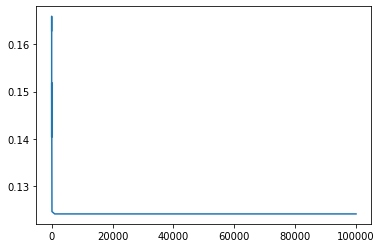

In [120]:
plt.plot(it, nn)
plt.show()

## Ex. 7.3 MNIST (BONUS)
Train your network on the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) and state the model accuracy (or the model error) for the training and test sets. **(RESULT)** Compare to this [list](https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#4d4e495354)
